In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im_og = cv.imread("imagencolor2.jpg")
im_rgb = cv.cvtColor(im_og, cv.COLOR_BGR2RGB) # OpenCV opera en BGR, toca pasarlo a RGB antes de operar
im_gs = cv.cvtColor(im_rgb,cv.COLOR_RGB2GRAY) #Imagen en escala de grises


In [3]:
rows,columns = im_gs.shape
print(rows,columns)

200 200


In [4]:
def moore(x,y,c_i,g_i):
    mv = np.zeros(8)
    moorev = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]
    i = 0
    for m_i,m_j in moorev:
        mv[i] = g_i[x+m_i,y+m_j]
        i = i+1
    rule = mv
    result = c_i[x,y]
    return rule,result

        

In [5]:
rulebook = np.zeros((rows-1,columns-1,8),dtype=np.uint8)
colorbook = np.zeros((rows-1,columns-1,3),dtype=np.uint8)
i_im = 0
for (x_t,y_t),valor in np.ndenumerate(im_gs[0:rows-1,0:columns-1]):
    rulebook[x_t,y_t],colorbook[x_t,y_t] = moore(x_t,y_t,im_rgb,im_gs)
    if(i_im<1):
        print(rulebook[x_t,y_t],colorbook[x_t,y_t],i_im)
    i_im = i_im+1
     

[77 77 80 83 83 81 79 81] [252   9   5] 0


In [6]:
rb1 = rulebook
cb1 = colorbook

In [7]:
print(rb1[0,0])

[77 77 80 83 83 81 79 81]


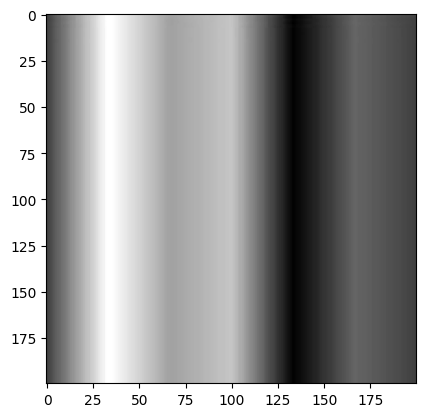

In [8]:
plt.imshow(im_gs,"gray")

In [9]:
def masker(x_im, res):
    mask = x_im.copy()  
    for (x_t, y_t), valor in np.ndenumerate(x_im):
        i_t = 1
        res_h = 256 /res
        step_r = 256 /res
        while i_t <= res :
            if valor  < step_r*i_t:
                mask[x_t, y_t] = (step_r*i_t)-(res/2)
                i_t = 17
            else:
                i_t = i_t+1
    return mask

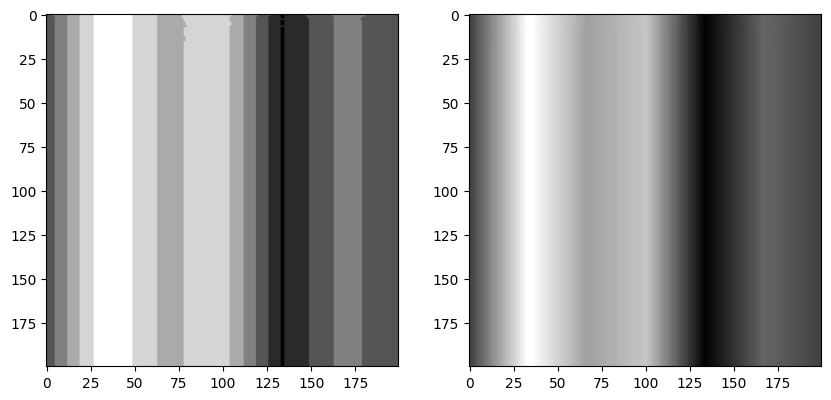

In [10]:
mask_gs = masker(im_gs,8)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(mask_gs,"gray")
axes[1].imshow(im_gs,"gray")


In [11]:
rulebook_lq = np.zeros((rows-1,columns-1,8),dtype=np.uint8)
colorbook_lq = np.zeros((rows-1,columns-1,3),dtype=np.uint8)
i_im = 0
for (x_t,y_t),valor in np.ndenumerate(im_gs[0:rows-1,0:columns-1]):
    rulebook_lq[x_t,y_t],colorbook_lq[x_t,y_t] = moore(x_t,y_t,im_rgb,mask_gs)
    if(i_im<1):
        print(rulebook_lq[x_t,y_t],colorbook_lq[x_t,y_t],i_im)
    i_im = i_im+1

[92 92 92 92 92 92 92 92] [252   9   5] 0


In [12]:
rulebook1d = rulebook.reshape(-1,rulebook.shape[-1])
colorbook1d = colorbook.reshape(-1,colorbook.shape[-1])
rulebook1d_lq = rulebook_lq.reshape(-1,rulebook_lq.shape[-1])
colorbook1d_lq = colorbook.reshape(-1,colorbook_lq.shape[-1])
print(colorbook1d_lq[0:11,0:11])

[[252   9   5]
 [253  12   5]
 [252  19   4]
 [253  27   3]
 [255  36   6]
 [255  46   7]
 [255  53   7]
 [253  57   5]
 [255  68  10]
 [255  73   8]
 [253  79   6]]


In [13]:
ruleset1,rsindex1 = np.unique(rulebook1d_lq,axis = 0, return_index = True)
ruleset2,rsindex2 = np.unique(rulebook1d,axis = 0, return_index = True)
print(rsindex1.size,rsindex2.size)

135 1852


In [14]:

cb2 = np.zeros((rows-1,columns-1,3),dtype=np.uint8)
i_dd = 0
for x_n in range(rows-1):
    for y_n in range(columns-1):
        rule_found = False  # Bandera para indicar si se encontró una regla coincidente
        
        for x_ind in rsindex2:
                if np.all(rulebook[x_n, y_n] == rulebook1d[x_ind]):
                    cb2[x_n, y_n] = colorbook1d[x_ind]
                    if (i_dd % 1000 ==0):
                        print(colorbook1d_lq[x_ind])
                        print(i_dd)
                    i_dd = i_dd+1
                    rule_found = True  # Establecer la bandera en Verdadero
                    break
        if rule_found:
            continue 
            

[252   9   5]
0
[255  40   1]
1000
[253  76   0]
2000
[255 114   0]
3000
[255 153   2]
4000
[253 188   0]
5000
[255 229   2]
6000
[243 253   8]
7000
[203 254   1]
8000
[163 254   3]
9000
[129 253   7]
10000
[ 90 254   9]
11000
[ 50 255   0]
12000
[ 11 255   1]
13000
[  0 255  25]
14000
[  1 255  61]
15000
[  2 254 105]
16000
[  1 255 141]
17000
[  3 253 179]
18000
[  3 254 209]
19000
[  3 253 251]
20000
[  2 218 255]
21000
[  0 178 255]
22000
[  0 140 253]
23000
[  0 100 252]
24000
[  0  62 255]
25000
[  1  23 254]
26000
[ 14   1 255]
27000
[ 51   0 253]
28000
[ 89   0 252]
29000
[128   1 255]
30000
[163   0 254]
31000
[202   1 255]
32000
[242   1 255]
33000
[253   0 228]
34000
[255   2 191]
35000
[254   1 152]
36000
[253   1 114]
37000
[255   1  79]
38000
[254   0  37]
39000


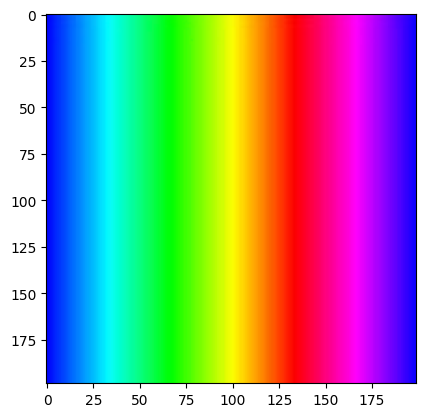

In [15]:
image = cv.cvtColor(cb2, cv.COLOR_RGB2BGR)  # If you want RGB color order

# Display the image
plt.imshow(image)


200 200


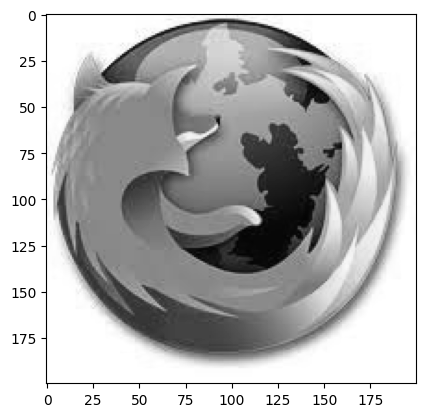

In [16]:
im_og_t = cv.imread("test.jpg")
im_rgb_t = cv.cvtColor(im_og_t, cv.COLOR_BGR2RGB) # OpenCV opera en BGR, toca pasarlo a RGB antes de operar
im_gs_t = cv.cvtColor(im_rgb_t,cv.COLOR_RGB2GRAY) #Imagen en escala de grises
rows_t,columns_t = im_gs_t.shape
print(rows_t,columns_t)
plt.imshow(im_gs_t,"gray")

In [17]:
i_im = 0
rulebook_t = np.zeros((rows_t-1,columns_t-1,8),dtype=np.uint8)
colorbook_t = np.zeros((rows_t-1,columns_t-1,3),dtype=np.uint8)
for (x_t,y_t),valor in np.ndenumerate(im_gs[0:rows_t-1,0:columns_t-1]):
    rulebook_t[x_t,y_t],colorbook_t[x_t,y_t] = moore(x_t,y_t,im_rgb_t,im_gs_t)
    if(i_im<1):
        print(rulebook_t[x_t,y_t],i_im)
        print(rulebook[x_t,y_t],i_im)
    i_im = i_im+1

[255 255 255 255 255 255 255 255] 0
[77 77 80 83 83 81 79 81] 0


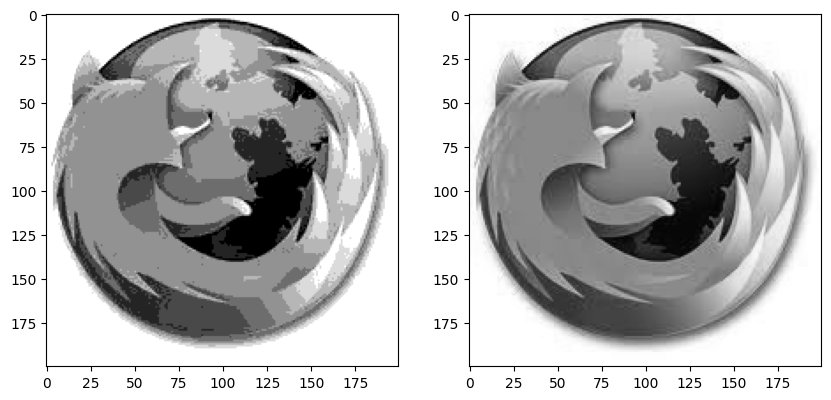

In [18]:
mask_test = masker(im_gs_t,8)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(mask_test,"gray")
axes[1].imshow(im_gs_t,"gray")

In [19]:
i_im = 0
rulebook_m = np.zeros((rows_t-1,columns_t-1,8),dtype=np.uint8)
colorbook_m = np.zeros((rows_t-1,columns_t-1,3),dtype=np.uint8)
for (x_t,y_t),valor in np.ndenumerate(im_gs[0:rows_t-1,0:columns_t-1]):
    rulebook_m[x_t,y_t],colorbook_m[x_t,y_t] = moore(x_t,y_t,im_rgb_t,mask_test)
    if(i_im<1):
        print(rulebook_m[x_t,y_t],i_im)
        print(rulebook[x_t,y_t],i_im)
    i_im = i_im+1
print(rulebook_m.shape)


[252 252 252 252 252 252 252 252] 0
[77 77 80 83 83 81 79 81] 0
(199, 199, 8)


In [20]:
#i_rec = 0
colorbook_1 = np.full((rows_t, columns_t, 3), 255, dtype=np.uint8)
i_dd = 0
for x_test in range(rows_t-1):
    for y_test in range(columns_t-1):
        #rule_found = False  # Bandera para indicar si se encontró una regla coincidente
        for x_ind in rsindex1:
                if np.all(rulebook_m[x_test, y_test] == rulebook1d_lq[x_ind]):
                    colorbook_1[x_test, y_test] = colorbook1d_lq[x_ind]
                    if (i_dd% 100 ==0):
                        print(colorbook_1.shape,x_test,y_test,x_ind)
                    i_dd = i_dd+1
                  #  rule_found = True  # Establecer la bandera en Verdadero
                    break
       # if rule_found:
            #continue 
            

(200, 200, 3) 6 99 182
(200, 200, 3) 12 108 20
(200, 200, 3) 15 71 20
(200, 200, 3) 17 73 20
(200, 200, 3) 19 73 20
(200, 200, 3) 21 63 20
(200, 200, 3) 22 109 20
(200, 200, 3) 24 66 20
(200, 200, 3) 25 97 28
(200, 200, 3) 27 61 20
(200, 200, 3) 29 45 0
(200, 200, 3) 31 42 0
(200, 200, 3) 33 20 20
(200, 200, 3) 34 117 1470
(200, 200, 3) 37 131 181
(200, 200, 3) 40 125 20
(200, 200, 3) 42 53 261
(200, 200, 3) 43 105 20
(200, 200, 3) 45 32 1470
(200, 200, 3) 46 65 13
(200, 200, 3) 47 76 20
(200, 200, 3) 48 84 20
(200, 200, 3) 49 73 410
(200, 200, 3) 50 54 13
(200, 200, 3) 51 30 673
(200, 200, 3) 51 148 13
(200, 200, 3) 52 116 20
(200, 200, 3) 53 104 20
(200, 200, 3) 54 73 204
(200, 200, 3) 55 58 13
(200, 200, 3) 56 49 13
(200, 200, 3) 57 36 13
(200, 200, 3) 57 175 460
(200, 200, 3) 58 146 13
(200, 200, 3) 59 115 13
(200, 200, 3) 60 80 6
(200, 200, 3) 61 61 13
(200, 200, 3) 62 36 13
(200, 200, 3) 62 175 20
(200, 200, 3) 64 19 13
(200, 200, 3) 65 38 13
(200, 200, 3) 66 46 13
(200, 200, 3) 

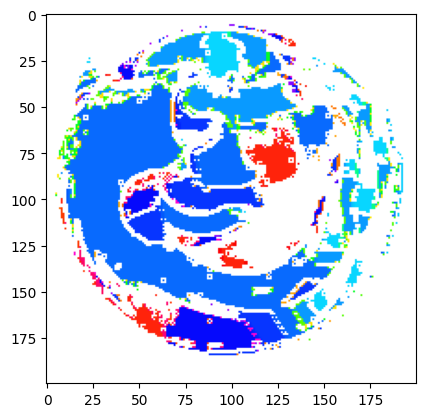

In [21]:
image = cv.cvtColor(colorbook_1, cv.COLOR_BGR2RGB)  # If you want RGB color order

# Display the image
plt.imshow(image)

In [22]:
print("a")

a
